In [1]:
import numpy as np
from scipy import stats
from statsmodels.tsa.stattools import adfuller
import scipy.io
import matplotlib.pyplot as plt

In [11]:
def calculate_rms(signal):
    return np.sqrt(np.mean(signal**2))

def check_normality(cycles, alpha):
    results = []
    for cycle in cycles:
        _, pr = stats.normaltest(cycle)
        results.append(pr > alpha)
    return results

def check_homoscedasticity(cycles, alpha):
    _, pr = stats.levene(*cycles)
    return pr > alpha

def compare_cycles_mann_whitney(cycle1, cycle2, alpha):
    _, pr = stats.mannwhitneyu(cycle1, cycle2)
    return pr < alpha

def check_stationarity(cycles, alpha):
    results = []
    for cycle in cycles:
        dfuller_result = adfuller(cycle)
        results.append(dfuller_result[1] > alpha)
    return results

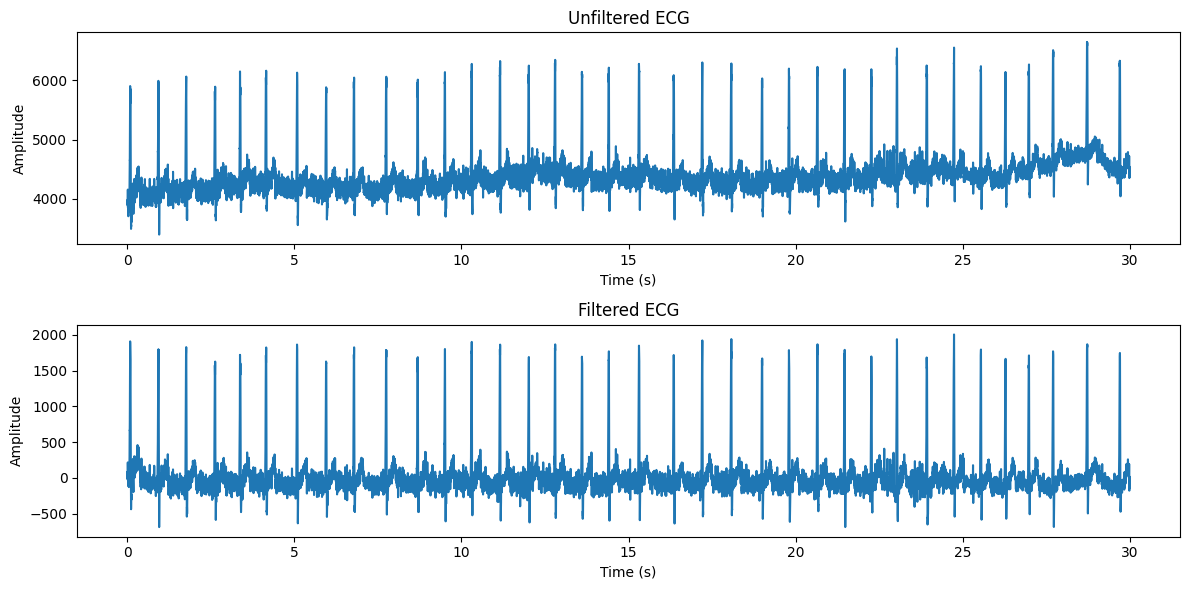

In [3]:
# Load data
data = scipy.io.loadmat('signals.mat')

# Create time vector
sampling_freq = data['Fs'][0][0]  # Sampling frequency
num_samples = np.shape(data['ECG_asRecording'])[1]  # Number of samples
time_vector = np.linspace(0, (num_samples/sampling_freq), num_samples)  # Time vector

# Plot unfiltered and filtered signal
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(time_vector, data['ECG_asRecording'][0])
plt.title('Unfiltered ECG')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(212)
plt.plot(time_vector, data['ECG_filtered'][0])
plt.title('Filtered ECG')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

En la señal filtrada del electrocardiograma (ECG), se observa una modificación considerable en las amplitudes de la señal. Las amplitudes elevadas, que podrían ser producto de fuentes de ruido como la interferencia muscular o los artefactos, parecen haber sido reducidas de manera significativa por el filtro. Este efecto de atenuación de las amplitudes altas es ventajoso en situaciones donde el ruido es predominante, ya que permite que los picos generados por el ruido sean disminuidos o eliminados, priorizando los valores más estables y representativos de la actividad cardíaca. Por otro lado, al examinar la señal del ECG en su estado original, se destacan picos agudos que corresponden a los complejos QRS, elementos distintivos del ECG relacionados con la contracción de los ventrículos. Sin embargo, también se percibe ruido en otros complejos del ECG

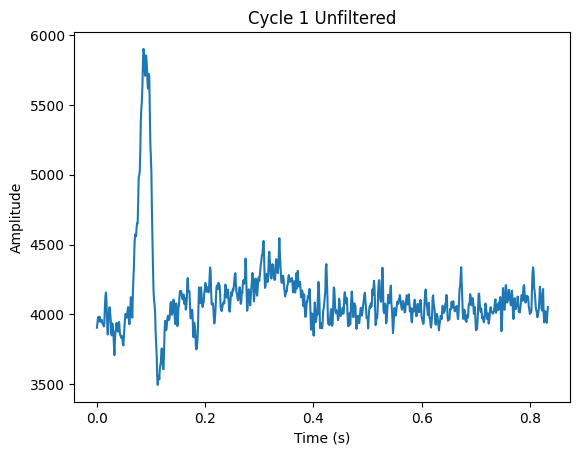

Unfiltered Cycle 1 - Mean: 4117.31206346284, RMS: 4127.435848292785, Variance: 83468.05383574814, Standard Deviation: 288.90838311781147


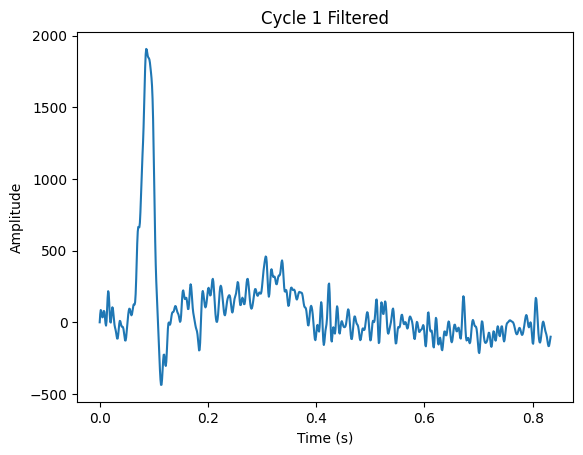

Filtered Cycle 1 - Mean: 86.54911385447427, RMS: 319.10590186975065, Variance: 94337.8274991122, Standard Deviation: 307.1446361229709


In [4]:
# Extract the first cycle from the unfiltered and filtered signals
unfiltered_signal = data['ECG_asRecording'][0]
filtered_signal = data['ECG_filtered'][0]
cycle_samples = 854  # This is the length of one cycle in your data
time_vector_cycle = time_vector[:cycle_samples]

# Unfiltered signal
first_cycle_unfiltered = unfiltered_signal[:cycle_samples]
plt.plot(time_vector_cycle, first_cycle_unfiltered)
plt.title('Cycle 1 Unfiltered')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Calculate statistics for the unfiltered signal
mean_unfiltered = np.mean(first_cycle_unfiltered)
rms_unfiltered = calculate_rms(first_cycle_unfiltered)
var_unfiltered = np.var(first_cycle_unfiltered)
std_unfiltered = np.std(first_cycle_unfiltered)
print(f'Unfiltered Cycle 1 - Mean: {mean_unfiltered}, RMS: {rms_unfiltered}, Variance: {var_unfiltered}, Standard Deviation: {std_unfiltered}')

# Filtered signal
first_cycle_filtered = filtered_signal[:cycle_samples]
plt.plot(time_vector_cycle, first_cycle_filtered)
plt.title('Cycle 1 Filtered')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Calculate statistics for the filtered signal
mean_filtered = np.mean(first_cycle_filtered)
rms_filtered = calculate_rms(first_cycle_filtered)
var_filtered = np.var(first_cycle_filtered)
std_filtered = np.std(first_cycle_filtered)
print(f'Filtered Cycle 1 - Mean: {mean_filtered}, RMS: {rms_filtered}, Variance: {var_filtered}, Standard Deviation: {std_filtered}')

Desde el análisis del filtrado, se pueden identificar patrones similares a los observados en la sección previa. En este caso, el filtro se activa para atenuar las amplitudes altas, lo que se evidencia al observar que los picos de la medición de voltaje alcanzan casi 4000 unidades de voltaje. Esto nos muestra que el pico de mayor amplitud es de alrededor de 1900, en contraste con la señal no filtrada que llega a aproximadamente 5900. El filtrado juega un papel crucial en el análisis del ECG, ya que permite eliminar las interferencias y ruidos que pueden distorsionar la interpretación de los datos. Al reducir las amplitudes altas que no son representativas de la actividad cardíaca, el filtrado permite resaltar los patrones y eventos cardíacos significativos.

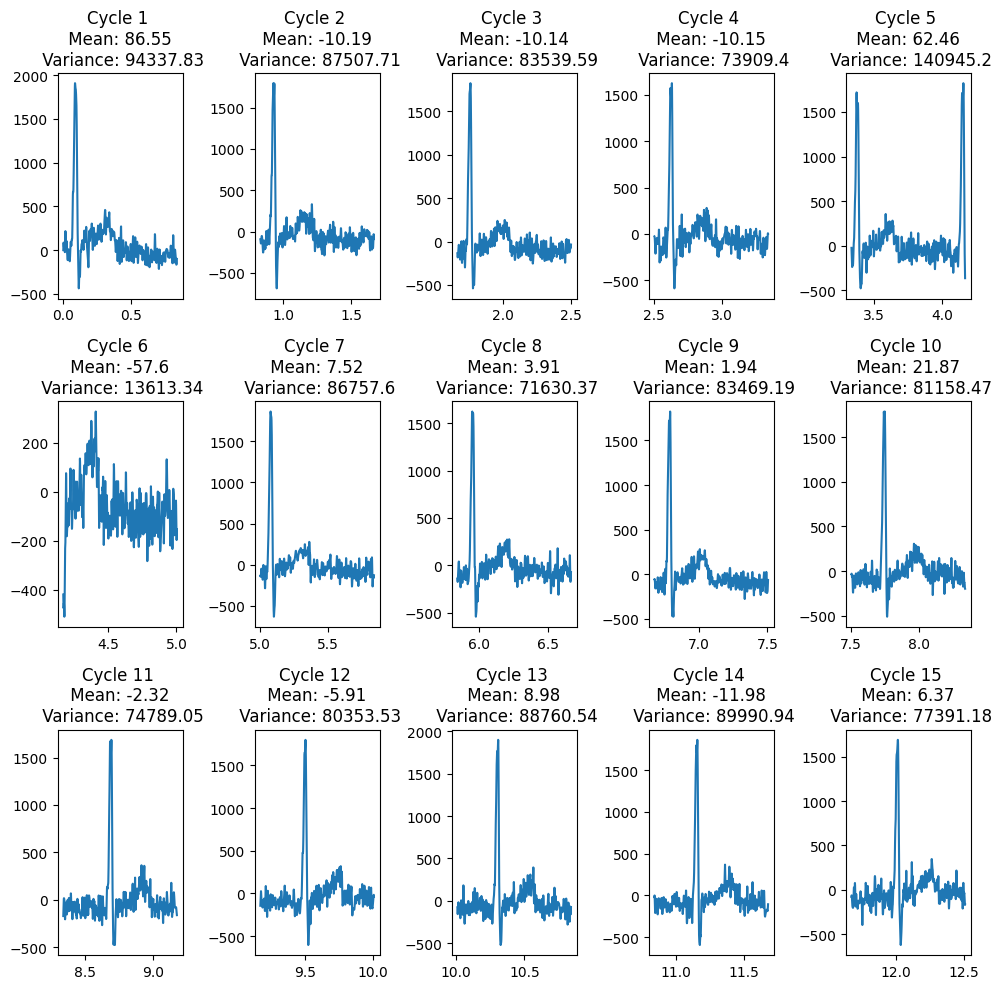

In [15]:
# Extract 15 cycles from the filtered signal
num_cycles = 15
cycles = []
filtered_signal = data['ECG_filtered'][0]
cycle_length = 854

plt.figure(figsize=(10, 10))

for i in range(num_cycles):
    start = i * cycle_length
    end = start + cycle_length
    cycle = filtered_signal[start:end]
    cycles.append(cycle)

    # Plot the cycle
    plt.subplot(3, 5, i+1)
    plt.plot(time_vector[start:end], cycle)
    plt.title(f'Cycle {i+1} \n Mean: {np.round(np.mean(cycle), 2)} \n Variance: {np.round(np.var(cycle), 2)}')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.tight_layout()
plt.show()


Exceptuando el primer ciclo, los demás ciclos muestran un patrón característico del ECG, evidenciado por el pico QRS. Sin embargo, es importante notar que el ciclo 1 y el ciclo 6 presentan rangos diferentes, con el primero alcanzando hasta los 2000 y el sexto llegando a los -500. A pesar de estas diferencias, la similitud entre la mayoría de los ciclos sugiere la presencia de un patrón repetitivo. No obstante, para confirmar esta hipótesis, sería necesario analizar una mayor cantidad de datos de esta señal. Esto subraya la importancia de tener un conjunto de datos amplio y representativo para el análisis del ECG.

In [9]:
# Check normality for the cycles
normality_results = check_normality(cycles[0:15], 0.05)
for i, result in enumerate(normality_results):
    print(f'Cycle {i+1} is {"normally distributed" if result else "not normally distributed"}')

Cycle 1 is not normally distributed
Cycle 2 is not normally distributed
Cycle 3 is not normally distributed
Cycle 4 is not normally distributed
Cycle 5 is not normally distributed
Cycle 6 is not normally distributed
Cycle 7 is not normally distributed
Cycle 8 is not normally distributed
Cycle 9 is not normally distributed
Cycle 10 is not normally distributed
Cycle 11 is not normally distributed
Cycle 12 is not normally distributed
Cycle 13 is not normally distributed
Cycle 14 is not normally distributed
Cycle 15 is not normally distributed


Con el proposito de realizar la prueba t se analizaron 15 ciclos para encontrtar alguno que tenga distribucion normal, sin embargo al no encontrar ninguno, no se realiza la prueba t, se procede con los primeros 4 ciclos las comparaciones entre 1 vs 2 , 3 vs 4

In [12]:
# Check homoscedasticity for the first 4 cycles
homoscedasticity_result = check_homoscedasticity(cycles[:4], 0.05)
print(f'Homoscedasticity assumption is {"met" if homoscedasticity_result else "not met"}')

# Compare cycles 1 and 2 using Mann-Whitney test
mann_whitney_result = compare_cycles_mann_whitney(cycles[0], cycles[1], 0.05)
print(f'There is {"a statistical difference" if mann_whitney_result else "no significant difference"} between cycles 1 and 2')

# Compare cycles 3 and 4 using Mann-Whitney test
mann_whitney_result = compare_cycles_mann_whitney(cycles[2], cycles[3], 0.05)
print(f'There is {"a statistical difference" if mann_whitney_result else "no significant difference"} between cycles 3 and 4')


Homoscedasticity assumption is met
There is a statistical difference between cycles 1 and 2
There is no significant difference between cycles 3 and 4


En el análisis de los ciclos de la señal ECG, se observó que el ciclo 1 presentaba características distintas a los demás ciclos. Esta singularidad del ciclo 1 se refleja en los resultados de la prueba t, donde se encontró una diferencia estadística significativa entre los ciclos 1 y 2. Este hallazgo, respaldado por un valor p menor a alpha, sugiere que el ciclo 1 podría estar influenciado por factores o condiciones diferentes a los demás ciclos.

Por otro lado, no se encontró una diferencia significativa entre los ciclos 3 y 4. Esto podría sugerir que estos ciclos son más consistentes entre sí, posiblemente debido a la ausencia de factores perturbadores durante estos periodos.

Estos hallazgos ponen de manifiesto la complejidad de la señal ECG y la importancia de considerar cada ciclo individualmente. Aunque se observan patrones similares a lo largo de los 15 ciclos, las diferencias estadísticas entre algunos de ellos indican que la señal no es completamente estacionaria. Por lo tanto, aunque la señal ECG puede mostrar cierta regularidad, también puede estar sujeta a variaciones, lo que subraya la necesidad de un análisis cuidadoso y detallado. La singularidad del ciclo 1 resalta la importancia de este análisis individualizado.

In [13]:
# Check stationarity for the first 4 cycles
stationarity_results = check_stationarity(cycles[:4], 0.05)
for i, result in enumerate(stationarity_results):
    print(f'Data of cycle {i+1} are {"stationary" if result else "not stationary"}')

Data of cycle 1 are stationary
Data of cycle 2 are stationary
Data of cycle 3 are stationary
Data of cycle 4 are stationary


A partir de la implementación de la prueba de Dickey-Fuller, se puede concluir que los primeros cuatro ciclos de la señal ECG son estacionarios. Esto significa que estas partes de la señal no presentan tendencias ni cambios sistemáticos a lo largo del tiempo, lo cual es una característica clave para el análisis y la interpretación de los datos del ECG. Sin embargo, es importante recordar que la estacionariedad es una suposición que puede no mantenerse en todas las partes de la señal, y por lo tanto, siempre es recomendable realizar pruebas de estacionariedad al analizar nuevas secciones de la señal.